In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.stats as st
from scipy.spatial import ConvexHull, distance_matrix
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import trange, tqdm

import math
import random
from abc import ABC, abstractmethod
from typing import Union

from MH import *
from funcs import *

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

%matplotlib inline

plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 16
# plt.rcParams['legend.fontsize'] = 'medium'
# plt.rcParams['figure.titlesize'] = 'large'

In [4]:
class DatasetGenerator(ABC):
    def __init__(self, N=100):
        self.N = N
        self.x = None
        self.v = None
        self.refresh()
    
    @abstractmethod
    def refresh(self):
        pass

class G1(DatasetGenerator):
    def refresh(self):
        self.x = np.random.rand(self.N, 2)
        self.v = np.random.rand(self.N)

class G2(DatasetGenerator):
    def refresh(self):
        self.x = np.random.rand(self.N, 2)
        self.v = np.exp(np.random.randn(self.N) * 1.3 - 0.85)

In [5]:
g = G1(100)
g.refresh()

In [6]:
gname = 'G1'

In [7]:
all_val =  []
all_num_city  = []
all_lam = np.round(np.arange(0, 1.1, 0.1), 2)

for lam in tqdm(all_lam):
    beta_schedule = getOptBetaSeq(gname, lam)
    beta = beta_schedule[0]
    inputs = {'v': g.v, 'x': g.x, 'lam': lam}
    init_state = np.random.randint(0, 2, size=len(g.v), dtype=bool)
    optim = optimizer(objective, transition, beta, init_state, **inputs)
    num_iters = 2000
    val, num_cities = optim.run(iters=num_iters, beta_schedule=beta_schedule, reset=True)
    all_val.append(val)
    all_num_city.append(np.sum(num_cities, axis=1))

Original lambda is 0.0 Corrected one is 0.0
Original lambda is 0.1 Corrected one is 0.1
Original lambda is 0.2 Corrected one is 0.2
Original lambda is 0.3 Corrected one is 0.3
Original lambda is 0.4 Corrected one is 0.4
Original lambda is 0.5 Corrected one is 0.5
Original lambda is 0.6 Corrected one is 0.6
Original lambda is 0.7 Corrected one is 0.7
Original lambda is 0.8 Corrected one is 0.8
Original lambda is 0.9 Corrected one is 0.9
Original lambda is 1.0 Corrected one is 1.0



In [8]:
def getMaxVal(val, num_cities):
    max_obj_val = np.max(val)
    corr_num_cities = num_cities[np.argmax(val)]
    return max_obj_val, corr_num_cities

In [9]:
def plot_optim_process(ind):
    plt.clf()
    fig, ax1 = plt.subplots()
    fig.set_size_inches(13, 8)
    ax1.plot(range(num_iters), all_val[ind], label='Objective function')
    ax1.set_xlabel('step')
    ax1.set_ylabel('Objective value')
    ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}$, {1:s})'.format(all_lam[ind], gname))

    ax2 = ax1.twinx()
    ax2.scatter(range(num_iters), all_num_city[ind], s=3, marker='d', color='r', label='Number of cities')
    ax2.set_ylabel('Number of cities')
    fig.legend(loc='lower right', bbox_to_anchor=(0.92, 0.1))
    fig.tight_layout()
    plt.savefig('plot_lambda_{}_{}.png'.format(all_lam[ind], gname))

    max_obj_val, corr_num_cities = getMaxVal(all_val[ind], all_num_city[ind])
    print(max_obj_val, corr_num_cities)

50.10578596058502 95
38.645130092652735 93
28.727295953795622 85
19.444592911639933 85
10.554600449014472 87
1.3375763343185127 86
-7.326211814087408 81
-14.433484134168012 72
-20.819545328543462 75
-33.18153201209734 78
-36.211708331273854 73


<Figure size 640x480 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

<Figure size 1040x640 with 0 Axes>

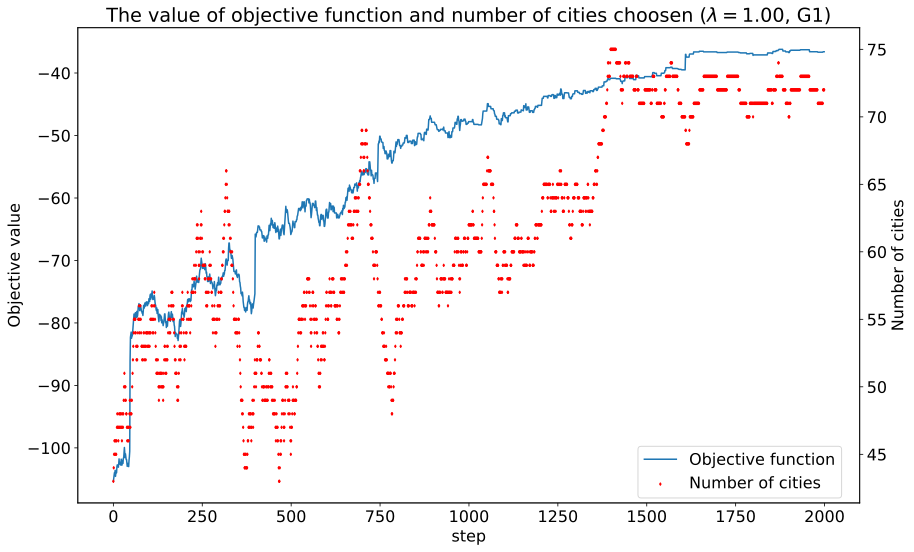

In [10]:
for i in range(len(all_lam)):
    plot_optim_process(i)

50.10578596058502 95


<Figure size 640x480 with 0 Axes>

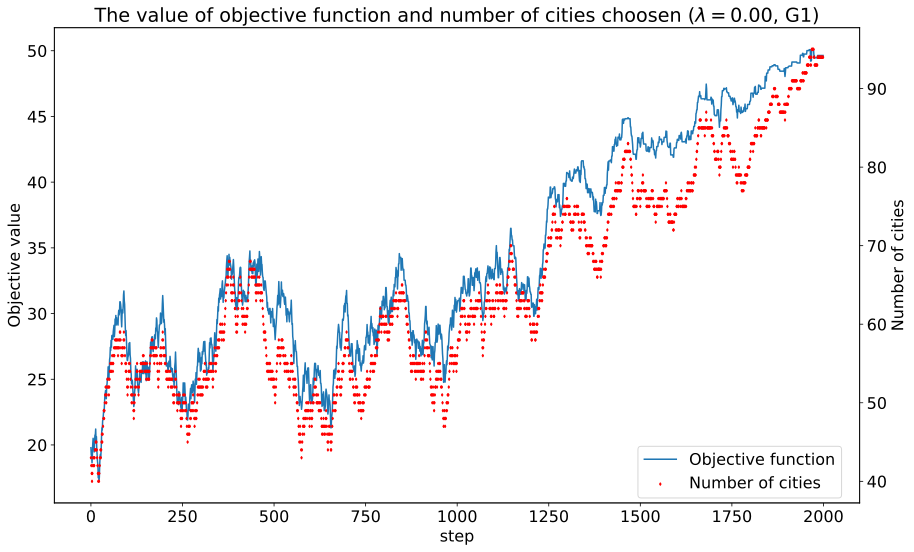

In [11]:
plot_optim_process(0)

19.444592911639933 85


<Figure size 640x480 with 0 Axes>

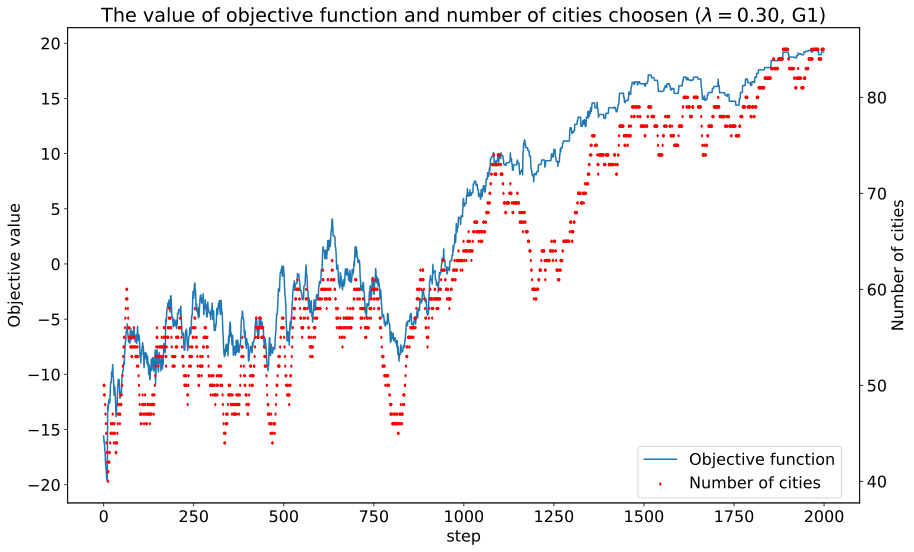

In [12]:
plot_optim_process(3)

-7.326211814087408 81


<Figure size 640x480 with 0 Axes>

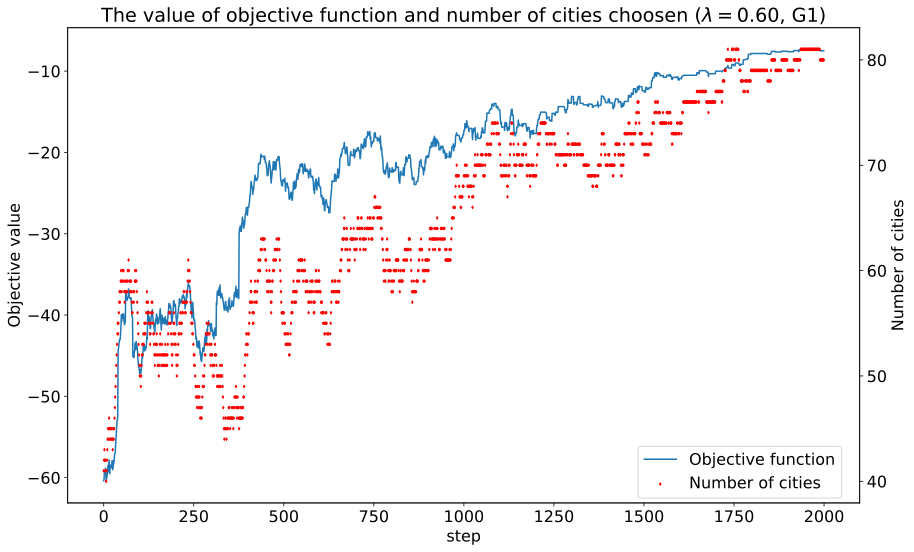

In [13]:
plot_optim_process(6)

-36.211708331273854 73


<Figure size 640x480 with 0 Axes>

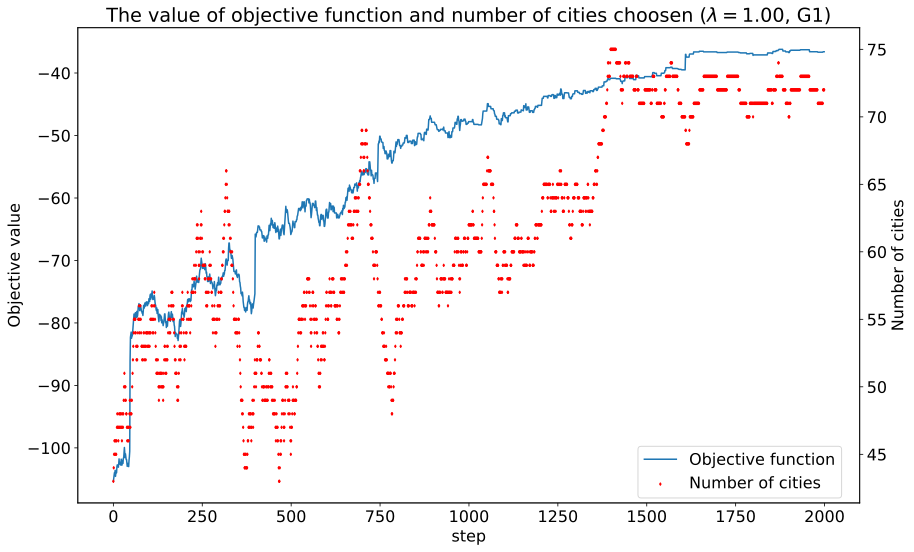

In [14]:
plot_optim_process(10)

In [15]:
optimal_num_cities = []
for i, l in enumerate(all_lam):
    curr_v, curr_n = getMaxVal(all_val[i], all_num_city[i])
    optimal_num_cities.append(curr_n)

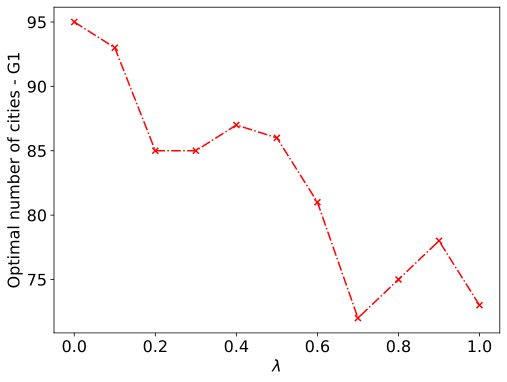

In [16]:
plt.plot(all_lam, optimal_num_cities, 'r-.')
plt.scatter(all_lam, optimal_num_cities, marker='x', color='r')
plt.xlabel(r'$\lambda$')
plt.ylabel('Optimal number of cities - {}'.format(gname))
plt.savefig('number_of_optimal_cities_trend{}.png'.format(gname))

In [70]:
all_val =  []
all_num_city  = []
all_lam = np.round(np.arange(0, 1.1, 0.1), 2)
g = G1(100)
gname = 'G1'
for lam in tqdm(all_lam):
    beta_schedule = getOptBetaSeq(gname, lam)
    beta = beta_schedule[0]
    curr_val = []
    curr_num_city = []
    for _ in trange(20):
        g.refresh()
        inputs = {'v': g.v, 'x': g.x, 'lam': lam}
        init_state = np.random.randint(0, 2, size=len(g.v), dtype=bool)
        optim = optimizer(objective, transition, beta, init_state, **inputs)
        num_iters = 2000
        val, num_cities = optim.run(iters=num_iters, beta_schedule=beta_schedule, reset=True)
        num_cities = np.sum(num_cities, axis=1)
        optim_val, optim_cities = getMaxVal(val, num_cities)
        curr_val.append(optim_val)
        curr_num_city.append(optim_cities)
    all_val.append(curr_val)
    all_num_city.append(curr_num_city)
all_val = np.array(all_val)
all_num_city = np.array(all_num_city)

RuntimeError: No active exception to reraise

In [32]:
expe_g1_f = np.mean(all_val, axis=1)
expe_g1_s = np.mean(all_num_city, axis=1)

<Figure size 640x480 with 0 Axes>

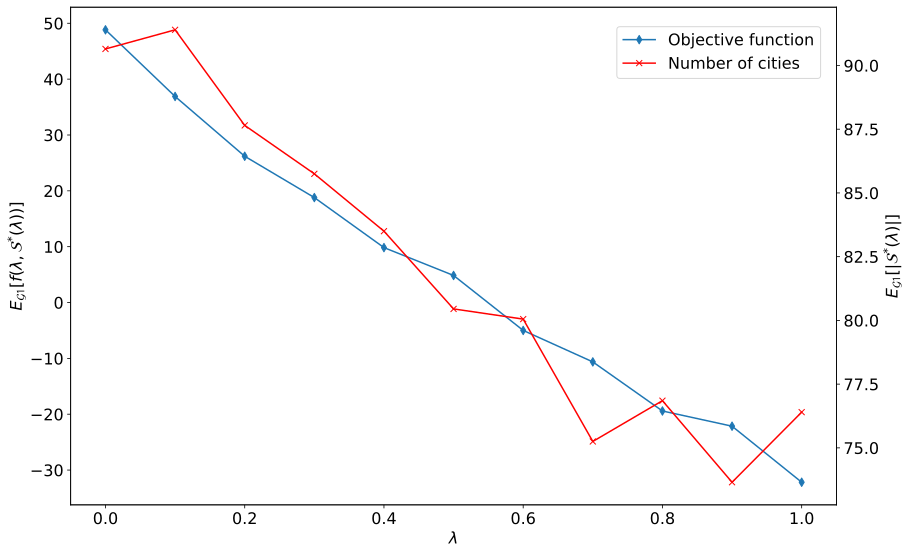

In [73]:
plt.clf()
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(all_lam, expe_g1_f, 'd-', label='Objective function')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$E_\mathcal{G1}[f(\lambda, \mathcal{S}^{*}(\lambda))]$')
# ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}$, {1:s})'.format(all_lam[ind], gname))

ax2 = ax1.twinx()
ax2.plot(all_lam, expe_g1_s, 'rx-', label='Number of cities')
ax2.set_ylabel('$E_\mathcal{G1}[\|\mathcal{S}^{*}(\lambda)\|]$')
fig.legend(bbox_to_anchor=(0.9, 0.95))
fig.tight_layout()
plt.savefig('plot_two_expe_G1.png')


In [74]:
all_val =  []
all_num_city  = []
all_lam = np.round(np.arange(0, 2.1, 0.1), 2)
g = G2(100)
gname = 'G2'
for lam in tqdm(all_lam):
    beta_schedule = getOptBetaSeq(gname, lam)
    beta = beta_schedule[0]
    curr_val = []
    curr_num_city = []
    for _ in trange(20):
        g.refresh()
        inputs = {'v': g.v, 'x': g.x, 'lam': lam}
        init_state = np.random.randint(0, 2, size=len(g.v), dtype=bool)
        optim = optimizer(objective, transition, beta, init_state, **inputs)
        num_iters = 2000
        val, num_cities = optim.run(iters=num_iters, beta_schedule=beta_schedule, reset=True)
        num_cities = np.sum(num_cities, axis=1)
        optim_val, optim_cities = getMaxVal(val, num_cities)
        curr_val.append(optim_val)
        curr_num_city.append(optim_cities)
    all_val.append(curr_val)
    all_num_city.append(curr_num_city)
all_val = np.array(all_val)
all_num_city = np.array(all_num_city)

RuntimeError: No active exception to reraise

In [66]:
expe_g2_f = np.mean(all_val, axis=1)
expe_g2_s = np.mean(all_num_city, axis=1)

<Figure size 640x480 with 0 Axes>

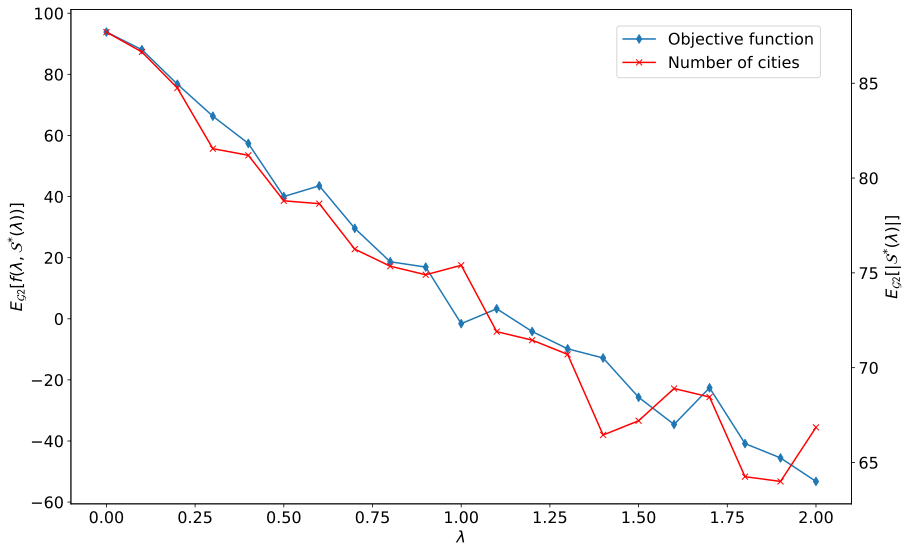

In [75]:
plt.clf()
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(all_lam, expe_g2_f, 'd-', label='Objective function')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$E_\mathcal{G2}[f(\lambda, \mathcal{S}^{*}(\lambda))]$')

# ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}$, {1:s})'.format(all_lam[ind], gname))

ax2 = ax1.twinx()
ax2.plot(all_lam, expe_g2_s, 'rx-', label='Number of cities')
ax2.set_ylabel('$E_\mathcal{G2}[\|\mathcal{S}^{*}(\lambda)\|]$')
fig.legend(bbox_to_anchor=(0.9, 0.95))
fig.tight_layout()
plt.savefig('plot_two_expe_G2.png')